## Data Understanding: Exploring the Dataset

This notebook will explore the dataset to identify potential feature issues fulfilling the Data Understanding phase of the CRISP-DM project planning framework. 

### Objectives:
1. **Understand the Dataset**: Gain familiarity with the dataset structure, including feature types, distributions, and relationships.
2. **Identify Potential Issues**:
   - Missing or incomplete data
   - Outliers or anomalies
   - Features that may require transformation 
3. **Document Observations**: Note any data quality issues and potential corrective actions.

The aim is to clearly understand the dataset and necessary preprocessing steps, ensuring readiness for the feature engineering and modeling stages.

In [1]:
#loading libraries
import numpy as np
import pandas as pd
import geopandas as gpd
from geodatasets import get_path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\eelil\.conda\envs\Machine_Learning_Analysis_of_Bank_Fraud\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\eelil\.conda\envs\Machine_Learning_Analysis_of_Bank_Fraud\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\eelil\.conda\envs\Machine_Learning_Analysis_of_Bank_Fraud\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [2]:
#path to local csv file
data = 'data/1/credit_card_transactions.csv'

#making dataframe
df = pd.read_csv(data)

I am working with a local copy of the CSV file instead of accessing the wandb artifact to ensure that any changes made during the data understanding phase remain temporary and do not affect the original data. In the next step, when I focus on preprocessing and feature creation, I will access the wandb artifact. Additionally, I am not incorporating logging into this file, as this notebook will serve as my log for this phase.

In [3]:
#viewing the first 5 rows of data
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 Riley Greens Suite 393  ... -118.2105      149   
2  Sanchez      M      594 White Dale Suite 530  ... -112.2620     4154   
3    White      M   9443 Cynthia Court Apt. 038  ... -112.1138     1939   
4   Garcia      M              408 Bradley Rest  ...  -79.4629       99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud  merch_zipcode  
0        0        28705.0  
1        0            NaN  
2        0        83236.0  
3        0            NaN  
4        0        22844.0  

[5 rows x 24 columns]

In [4]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

### Column Descriptions and Initial Observations

The dataset contains the following columns:

1. **Unnamed**: Original index column, redundant in this analysis.
2. **trans_date_trans_time**: Timestamp of the transaction.
3. **cc_num**: Credit card number (hashed or anonymized).
4. **merchant**: Merchant or store where the transaction occurred.
5. **category**: Type of transaction.
6. **amt**: Amount of the transaction.
7. **first**: First name of the cardholder.
8. **last**: Last name of the cardholder.
9. **gender**: Gender of the cardholder.
10. **street**: Address details of the cardholder.
11. **city**: Address details of the cardholder.
12. **state**: Address details of the cardholder.
13. **zip**: Address details of the cardholder.
14. **lat**: Geographical coordinates of the transaction.
15. **long**: Geographical coordinates of the transaction.
16. **city_pop**: Population of the city where the transaction occurred.
17. **job**: Occupation of the cardholder.
18. **dob**: Date of birth of the cardholder.
19. **trans_num**: Unique transaction number.
20. **unix_time**: Unix timestamp of the transaction.
21. **merch_lat**: Geographical coordinates of the merchant.
22. **merch_long**: Geographical coordinates of the merchant.
23. **is_fraud**: Indicator of whether the transaction is fraudulent.
24. **merch_zipcode**: Zip code of the merchant.

Based on the column descriptions and the initial inspection of the data (first five rows of the dataframe), the following columns will be removed:

1. **Unnamed**: This column served as the original index and is redundant.

2. **first**, **last**, **gender**, **street**:
   - **first** and **last** are not necessary for analysis, as the credit card number (`cc_num`) already identifies the account.
   - **gender** is unlikely to contribute to identifying fraudulent transactions and could introduce bias or discrimination into the model.
   - **unix_time** will be dropped if 'trans_data_trans_time' is complete.
   - **street**, **zip**, **merch_zipcode** will be dropped for redundency if other location based columns are complete.

**trans_num** will be retained to prevent identical values in other columns from mistakenly flagged as duplicates. 


In [5]:
#dropping unnamed column
df.drop(df.columns[df.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)

In [6]:
#dropping 'first', 'last', and 'gender'
df.drop(['first', 'last', 'gender'], axis=1, inplace=True)

In [7]:
#checking the number of records and columns
df.shape

(1296675, 20)

In [8]:
#dropping any duplicate rows
df.drop_duplicates(inplace=True)
#checking if the number of records changed
df.shape

(1296675, 20)

There were no duplicates in this dataset. However, I will add duplicate-checking in the data preparation phase to accommodate future datasets.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   street                 1296675 non-null  object 
 6   city                   1296675 non-null  object 
 7   state                  1296675 non-null  object 
 8   zip                    1296675 non-null  int64  
 9   lat                    1296675 non-null  float64
 10  long                   1296675 non-null  float64
 11  city_pop               1296675 non-null  int64  
 12  job                    1296675 non-null  object 
 13  dob                    1296675 non-null  object 
 14  trans_num         

In [10]:
#dropping redundant columns
df.drop(['street', 'zip', 'merch_zipcode', 'unix_time'], axis=1, inplace=True)

### Based on the datatypes and null values:

**Location Columns**
Due to redundancy, several location columns ('street,' 'zip,' 'merch_zipcode) were dropped. The latitude and longitude columns for customers and merchants are complete and will be utilized in the next phase. 

**Unix Time Column**
The 'unix_time' column was dropped for redundancy since 'trans_date_trans_time' is complete. I intend to make several new datetime columns, but I must streamline the dataset beforehand. 

**Columns with Unusual Data Types** 
- trans_date_trans_time  |  object 
- merchant               |  object 
- category               |  object 
- city                   |  object   
- state                  |  object  
- job                    |  object  
- dob                    |  object  
- is_fraud               |  int64    


Will be changed to: 
1. **'trans_data_trans_time', 'dob'** - datetime
2. **'merchant', 'category', 'city', 'state', 'job', 'is_fraud'** - category

In [11]:
#number of unique values in each column
df.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
city                         894
state                         51
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [12]:
#changing data types of some of the columns for easier plotting
#first the datetime columns
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date_trans_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1296675 entries, 0 to 1296674
Series name: trans_date_trans_time
Non-Null Count    Dtype         
--------------    -----         
1296675 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 9.9 MB


In [13]:
df['dob'] = pd.to_datetime(df['dob'])
df['dob'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1296675 entries, 0 to 1296674
Series name: dob
Non-Null Count    Dtype         
--------------    -----         
1296675 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 9.9 MB


In [14]:
#now the category columns
df[['category', 'merchant', 'job', 'is_fraud', 'state', 'city']] = df[['category', 'merchant', 'job', 'is_fraud', 'state', 'city']].astype('category')
df[['category', 'merchant', 'job', 'is_fraud', 'state', 'city']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype   
---  ------    --------------    -----   
 0   category  1296675 non-null  category
 1   merchant  1296675 non-null  category
 2   job       1296675 non-null  category
 3   is_fraud  1296675 non-null  category
 4   state     1296675 non-null  category
 5   city      1296675 non-null  category
dtypes: category(6)
memory usage: 11.2 MB


In [16]:
#checking data types before plotting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  category      
 3   category               1296675 non-null  category      
 4   amt                    1296675 non-null  float64       
 5   city                   1296675 non-null  category      
 6   state                  1296675 non-null  category      
 7   lat                    1296675 non-null  float64       
 8   long                   1296675 non-null  float64       
 9   city_pop               1296675 non-null  int64         
 10  job                    1296675 non-null  category      
 11  dob                    1296675 non-null  datetime64[ns]
 12  trans_num              12966

## Column Analysis

In [19]:
#grouping fraud accounts
fraud = df.groupby('is_fraud', observed=True)

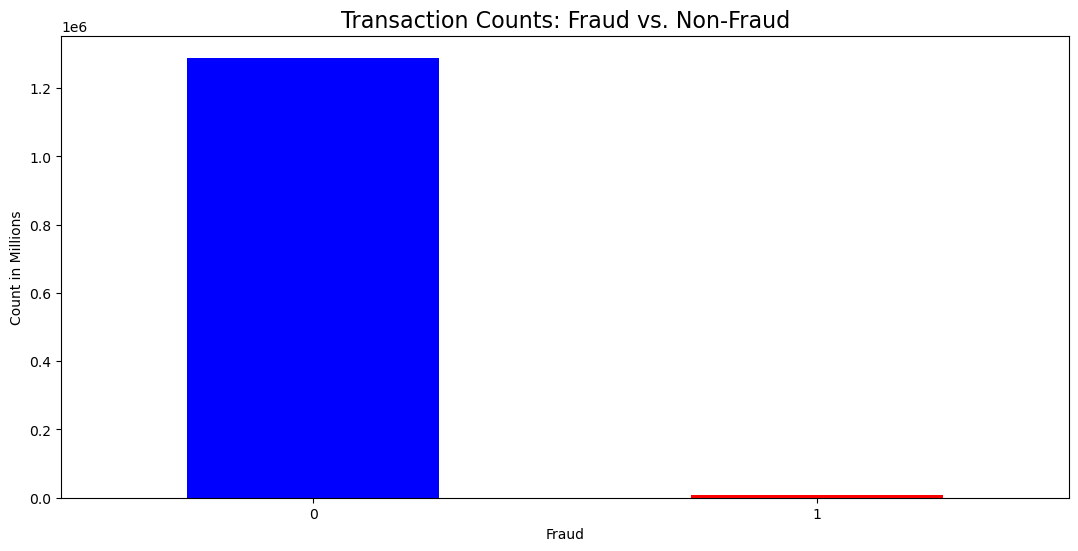

In [20]:
#visualizing what portion of the data is fraudulent transactions
fraud_counts = fraud.size()
ax = fraud_counts.plot(kind='bar', rot=0,  color=['blue', 'red'], figsize=(13,6))

plt.xlabel('Fraud')
plt.ylabel('Count in Millions')
ax.set_title('Transaction Counts: Fraud vs. Non-Fraud', fontsize=16)

plt.show()

In [21]:
# 1 = fraudulant transaction, 0 = non-fraudulant transaction
fraud_counts

is_fraud
0    1289169
1       7506
dtype: int64

In [28]:
fraud_percentages = (fraud_counts / fraud_counts.sum() * 100).round(2)
fraud_percentages

is_fraud
0    99.42
1     0.58
dtype: float64

**Less than 1% of the transactions are fraudulent.**

In [23]:
#calculating how much the fraud transactions are
fraud_amount = fraud['amt'].sum()
fraud_amount

is_fraud
0    87234340.29
1     3988088.61
Name: amt, dtype: float64

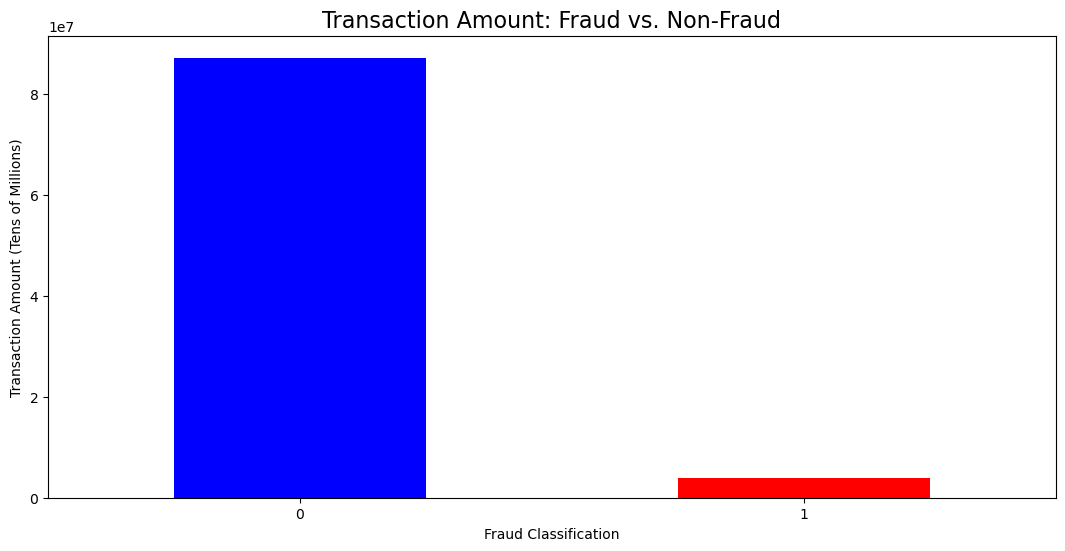

In [25]:
ax = fraud_amount.plot(kind='bar', rot=0,  color=['blue', 'red'], figsize=(13,6))

plt.xlabel('Fraud Classification')
plt.ylabel('Transaction Amount (Tens of Millions)')
ax.set_title('Transaction Amount: Fraud vs. Non-Fraud', fontsize=16)

plt.show()

In [29]:
fraud_amount_per = (fraud_amount / fraud_amount.sum() * 100).round(2)
fraud_amount_per

is_fraud
0    95.63
1     4.37
Name: amt, dtype: float64

**While it makes up over 4% of the transaction amount.** The 'is_fraud' column will not be adjusted. 

In [30]:
#looking further into transaction amount
amt = df['amt']
amt.describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [34]:
#for easier viewing
print(f"Min Transactional Amount ${amt.min():,.2f} and Max Transactional Amount ${amt.max():,.2f}")

Min Transactional Amount $1.00 and Max Transactional Amount $28,948.90


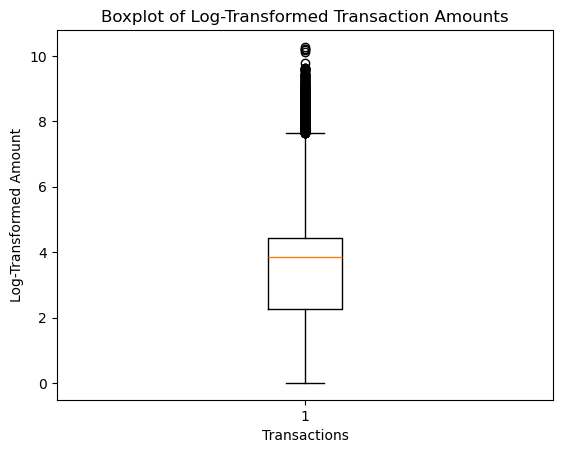

In [37]:
#applying a logarithmic transformation to the amount column for better visualization in the boxplot
amt_trans = np.log(amt[amt > 0])

#boxplot
plt.boxplot(amt_trans)
plt.xlabel("Transactions")
plt.ylabel("Log-Transformed Amount")
plt.title("Boxplot of Log-Transformed Transaction Amounts")
plt.show()

This plot highlights a relatively large number of outliers at the higher end of the transaction amounts. No issues requiring changes to the 'amt' column were identified at this stage.

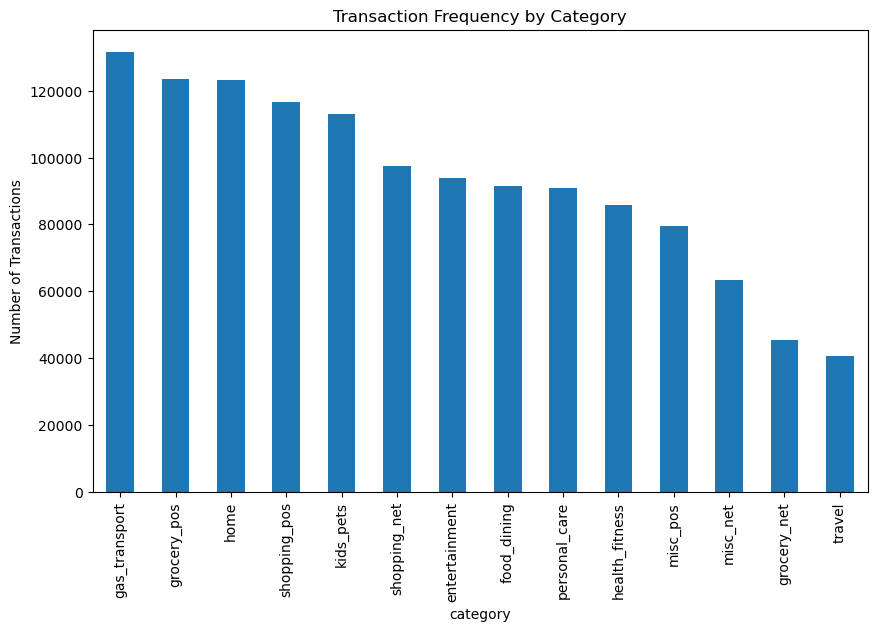

In [39]:
#plotting category frequency
df['category'].value_counts().plot(kind='bar', figsize=(10, 6), ylabel = 'Number of Transactions', title='Transaction Frequency by Category')
plt.show()

In [ ]:
map_file = r'C:\Users\eelil\OneDrive\Desktop\Capstone\Machine_Learning_Analysis_of_Bank_Fraud\map'

In [ ]:
#trying to plot customers on a map
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))
world = gpd.read_file(map_file)
ax = world.plot(color='lightgrey', edgecolor='black', figsize=(15,20))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
gdf.plot(ax=ax, color='red', markersize=1)
plt.xlim(-170, -50)
plt.ylim(10, 83)
ax.set_title("Customer Locations", fontsize=16)
plt.show()

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.merch_long, df.merch_lat))
world = gpd.read_file(map_file)
ax = world.plot(color='lightgrey', edgecolor='black', figsize=(15,20))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
gdf.plot(ax=ax, color='red', markersize=0.1)
plt.xlim(-170, -50)
plt.ylim(10, 83)
ax.set_title("Customer Locations", fontsize=16)
plt.show()

In [ ]:
#to prevent overfitting, I will drop zip and merch_zipcode, lat and long can be used in it's place. 
df.drop(['zip', 'merch_zipcode'], axis=1, inplace=True)   

In [ ]:
df.shape[1]

Running list of columns to drop:
- zip
- merch_zipcode
- first
- last
- gender
- unnamed column
- street
- 

In [ ]:
#transactions over time
df.hist(column='trans_date_trans_time', bins=18)
plt.show()

In [ ]:
#getting the number of transaction for each cc account
cc_counts = df.groupby('cc_num', observed=True).size()

In [ ]:
cc_counts.nunique()

In [ ]:
cc_counts.describe()

In [ ]:
cc_counts

In [ ]:
sorted_cc = cc_counts.sort_values()
sorted_cc

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(range(len(sorted_cc)), sorted_cc)
plt.xlabel('CC Account')
plt.ylabel('Number of Transactions')
plt.title("Number of Transactions for Each Account", fontsize=16)

plt.show()


Columns that will be dropped - 'unnamed', 'first', 'last', 'gender', 'street', 'zip', 'merch_zipcode', 'unix_time'

- no duplicates found

Data Type Changes
datetime - 'trans_data_trans_time', 'dob'
category 'merchant', 'category', 'city', 'state', 'job', 'is_fraud'

Columns that will not be changed - 'is_fraud', 'amt'

